In [1]:
from discode import models, utils

In [3]:
model = models.load("/home/sbml/jaehyung/DISCODE/weights/weights.pt")

In [4]:
name, sequence = "Q9K3J3", "MTRTPVNVTVTGAAGQIGYALLFRIASGQLLGADVPVKLRLLEITPALKAAEGTAMELDDCAFPLLQGIEITDDPNVAFDGANVALLVGARPRTKGMERGDLLEANGGIFKPQGKAINDHAADDIKVLVVGNPANTNALIAQAAAPDVPAERFTAMTRLDHNRALTQLAKKTGSTVADIKRLTIWGNHSATQYPDIFHATVAGKNAAETVNDEKWLADEFIPTVAKRGAAIIEARGASSAASAANAAIDHVYTWVNGTAEGDWTSMGIPSDGSYGVPEGIISSFPVTTKDGSYEIVQGLDINEFSRARIDASVKELSEEREAVRGLGLI"

In [5]:
model

TransformerClassifier(
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-7): 8 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=480, out_features=480, bias=True)
        )
        (linear1): Linear(in_features=480, out_features=480, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=480, out_features=480, bias=True)
        (norm1): LayerNorm((480,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((480,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc1): Linear(in_features=480, out_features=96, bias=True)
  (fc2): Linear(in_features=96, out_features=2, bias=True)
)

In [6]:
data = utils.tokenize_and_dataloader(name, sequence)
outlier_idx, probability, predicted_label, _name, attention_weights  = utils.model_prediction(data, model)

In [15]:
print(f"The label probability is {probability.detach().numpy()}")

The label probability is [9.990564e-01 9.300378e-04]


The maximum attention sum is ... 1637.513
The salient residues are ... ['A14', 'E43', 'I44', 'T45', 'G89']
The attention sum of A14 is ... 1251.160
The attention sum of E43 is ... 624.572
The attention sum of I44 is ... 1637.513
The attention sum of T45 is ... 430.036
The attention sum of G89 is ... 397.782


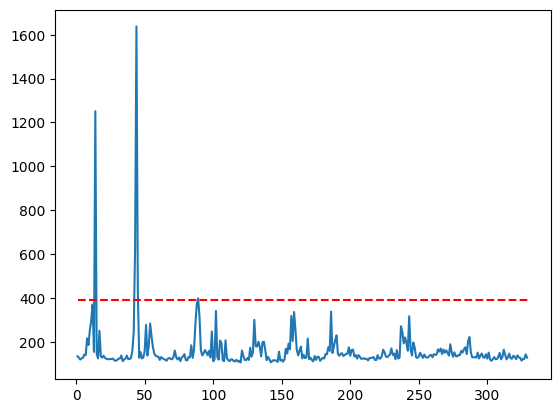

In [7]:
utils.plot_attention_sum(attention_weights, outlier_idx, sequence)

In [9]:
short = utils.scan_switch_mutation(model = model,
                                   max_num_mutation = 4,
                                   name = name,
                                   sequence = sequence,
                                   mode = "shortest")
short

The wildtype label probability is ...tensor([9.9906e-01, 9.3004e-04])
The mutation was derived in 2 mutations. Iteration stopped.


,NAD,NADP
Q9K3J3;E43S;I44R,0.292944,0.693356


In [10]:
iter_num = utils.scan_switch_mutation(model = model,
                                      max_num_mutation = 3,
                                      name = name,
                                      sequence = sequence,
                                      mode = "iterative_num")
iter_num

The wildtype label probability is ...tensor([9.9906e-01, 9.3004e-04])
The mutation step (('Q9K3J3',), 1) end...
The mutation step (('Q9K3J3',), 2) end...
The mutation was found in 2step


,NAD,NADP
Q9K3J3;E43S;I44R,0.292945,0.693356
Q9K3J3;E43A;I44S,0.369982,0.621812
Q9K3J3;E43V;I44S,0.466299,0.516228


In [11]:
iter_prob = utils.scan_switch_mutation(model = model,
                                       max_num_mutation = 3,                       
                                       name = name,
                                       sequence = sequence,
                                       mode = "iterative_prob")
iter_prob

The wildtype label probability is ...tensor([9.9906e-01, 9.3004e-04])
The mutation step (('Q9K3J3',), 1) end...
The mutation step (('Q9K3J3',), 2) end...
The mutation step (('Q9K3J3',), 3) end...


,NAD,NADP
Q9K3J3;A14W;E43S;I44R,0.032487,0.966856
Q9K3J3;A14S;E43S;I44R,0.032630,0.966500
Q9K3J3;A14F;E43S;I44R,0.034164,0.965119
Q9K3J3;A14T;E43S;I44R,0.034285,0.965097
Q9K3J3;A14N;E43S;I44R,0.041305,0.957810
Q9K3J3;A14H;E43S;I44R,0.041699,0.957208
Q9K3J3;A14N;E43A;I44S,0.044097,0.956914
Q9K3J3;A14R;E43S;I44R,0.042032,0.956760
Q9K3J3;A14Y;E43S;I44R,0.043562,0.955386
Q9K3J3;A14T;E43A;I44S,0.048488,0.952378
